<a href="https://colab.research.google.com/github/RIZ10000/ML/blob/master/Experiment/EXP_04_J047_270720.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 1 : Exploring Canadian immigration data from 1980 to 2013

Dataset : 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx'


In [1]:
import numpy as np  
import pandas as pd 

canada = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


**Preprocessing**

In [2]:
canada.drop(['AREA','Coverage','Type','REG','DEV'], axis='columns', inplace=True)

canada.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Continent-Region','DevName':'Development-status'}, inplace=True)

canada.set_index('Country', inplace=True)

canada['Total'] = canada.sum(axis='columns')

years = range(1980, 2014)

canada.head()

,Continent,Continent-Region,Development-status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


Things to do
Pie charts

1.   Pie charts
2.  Box plots
3. Scatter plots
4. Bubble plots


In [3]:
#import packages

import matplotlib.pyplot as plt
import matplotlib as mpl

## Pie Charts

Text(0.5, 1.0, 'Total immigration to Canada')

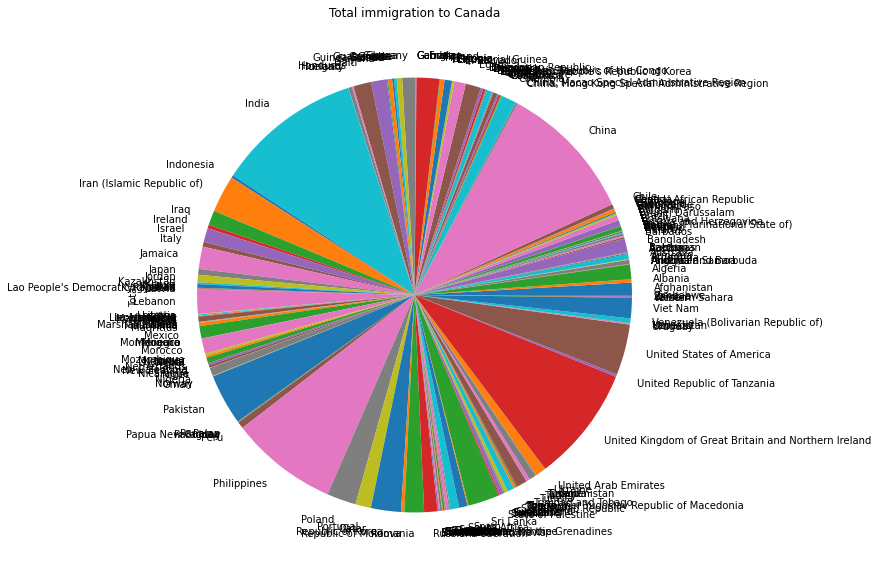

In [4]:
canada['Total'].plot(
    kind='pie',
    figsize=(10,10),
  )
plt.title("Total immigration to Canada")

Adding filters

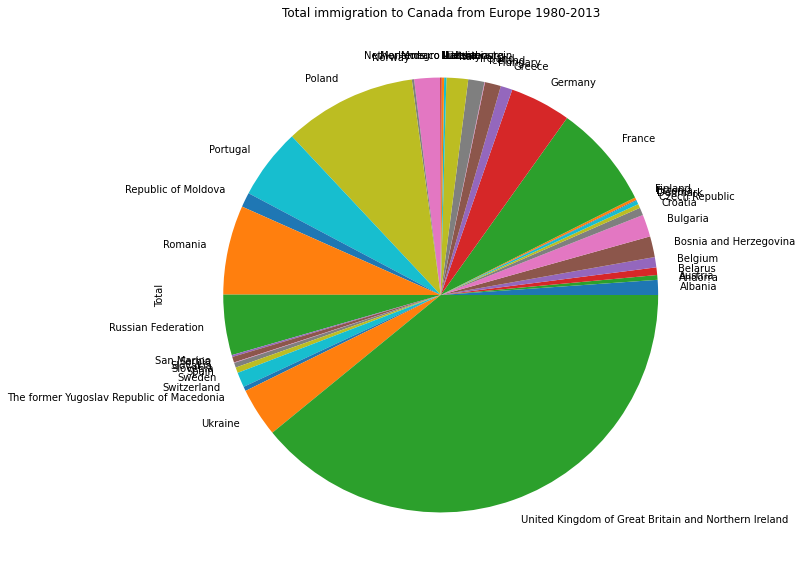

In [5]:
temp = canada[(canada['Continent']=='Europe')]

temp['Total'].plot(
    kind='pie',
    figsize=(10,10),
  )
plt.title("Total immigration to Canada from Europe 1980-2013")
plt.show()

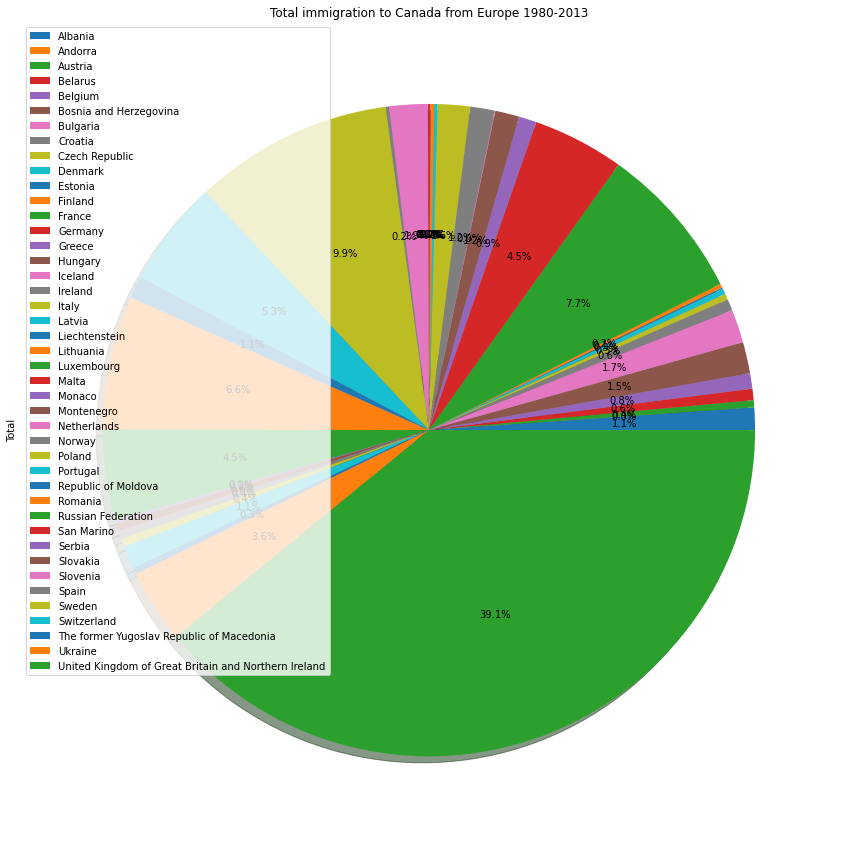

In [6]:
temp = canada[(canada['Continent']=='Europe')]

temp['Total'].plot(
    kind='pie',
    figsize=(15,15),
    autopct='%1.1f%%',
    shadow=True,
    labels=None
  )
plt.title("Total immigration to Canada from Europe 1980-2013")
plt.legend(labels=temp.index, loc="upper left")
plt.show()

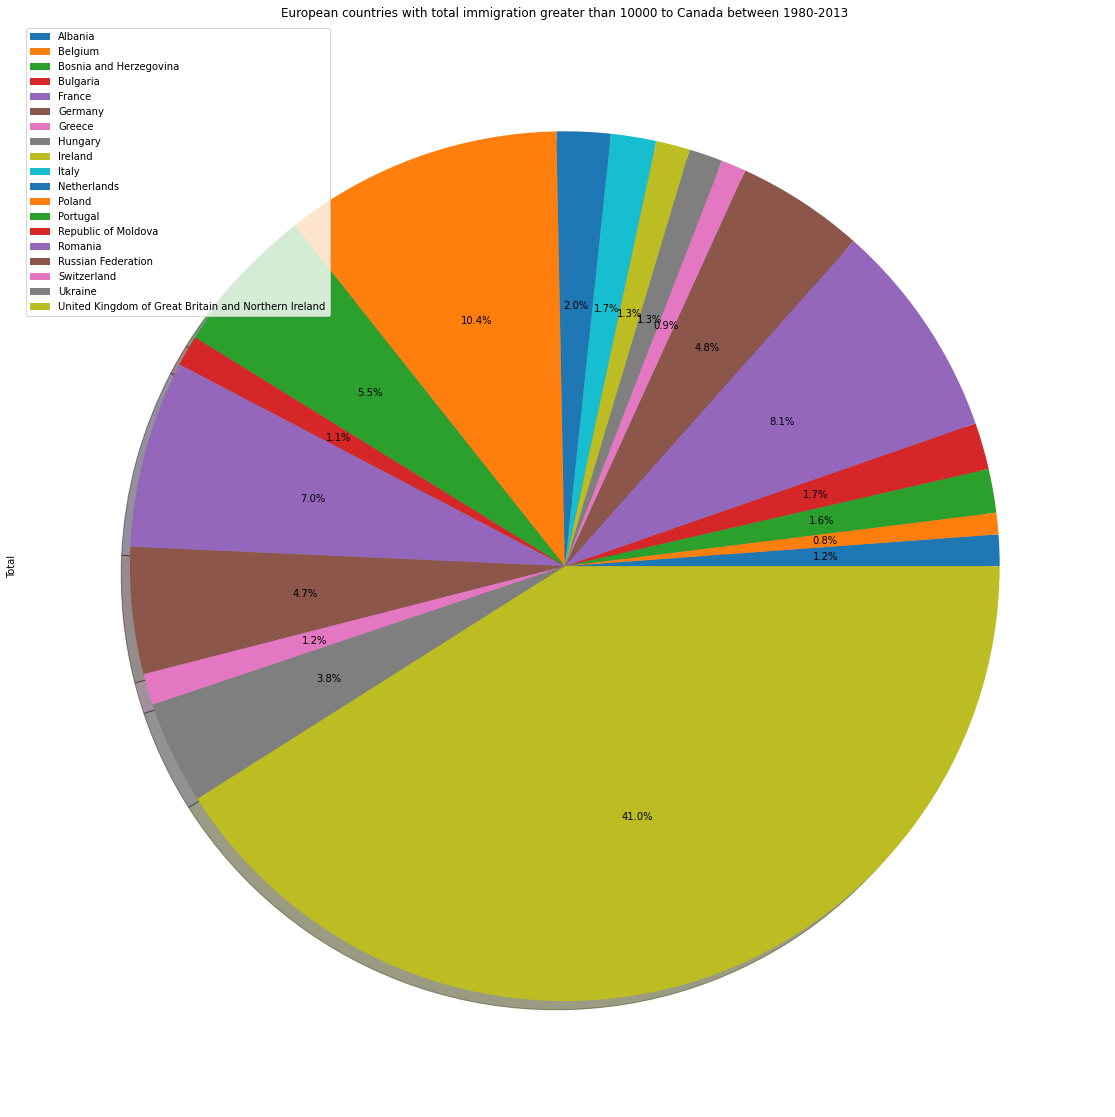

In [7]:
temp = canada[(canada['Continent']=='Europe') & (canada['Total']>10000)]

temp['Total'].plot(
    kind='pie',
    figsize=(20,20),
    autopct='%1.1f%%',
    shadow=True,
    labels=None
  )
plt.title("European countries with total immigration greater than 10000 to Canada between 1980-2013")
plt.legend(labels=temp.index, loc="upper left")
plt.show()

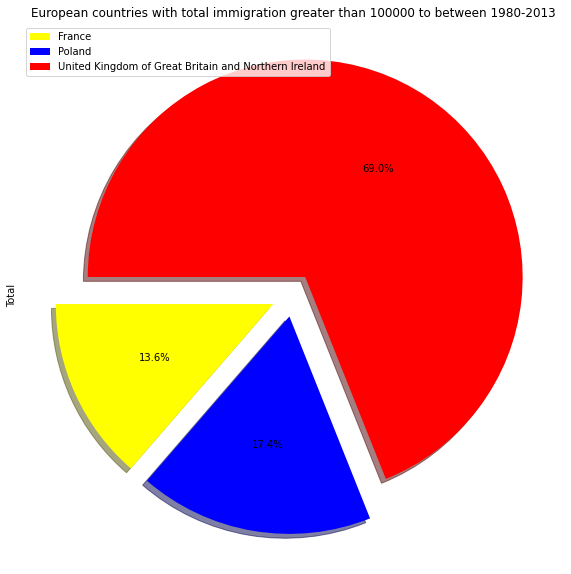

In [8]:
temp = canada[(canada['Continent']=='Europe') & (canada['Total']>100000)]

colors = ['yellow','blue','red']
explodes = [0.1,0.1,0.1]

temp['Total'].plot(
    kind='pie',
    figsize=(10,10),
    autopct='%1.1f%%',
    shadow=True,
    labels=None,
    colors=colors,
    explode=explodes,
    startangle = 180,
  )
plt.title("European countries with total immigration greater than 100000 to between 1980-2013")
plt.legend(labels=temp.index, loc="upper left")
plt.show()

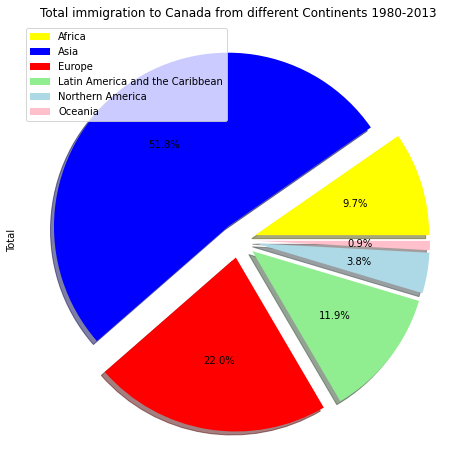

In [9]:
temp = canada.groupby('Continent', axis='rows').sum()

colors = ['yellow','blue','red','lightgreen','lightblue','pink']
explodes = [0.1,0.1,0.1,0.1,0.1,0.1]

temp['Total'].plot(
    kind='pie',
    figsize=(8,8),
    autopct='%1.1f%%',
    shadow=True,
    labels=None,
    colors=colors,
    explode=explodes
  )
plt.title("Total immigration to Canada from different Continents 1980-2013")
plt.legend(labels=temp.index, loc="upper left")
plt.show()

**Plot a pie-chart based on Immigration by Continent-Region use explode, pct, figsize, add title, add legend and use shadows.**

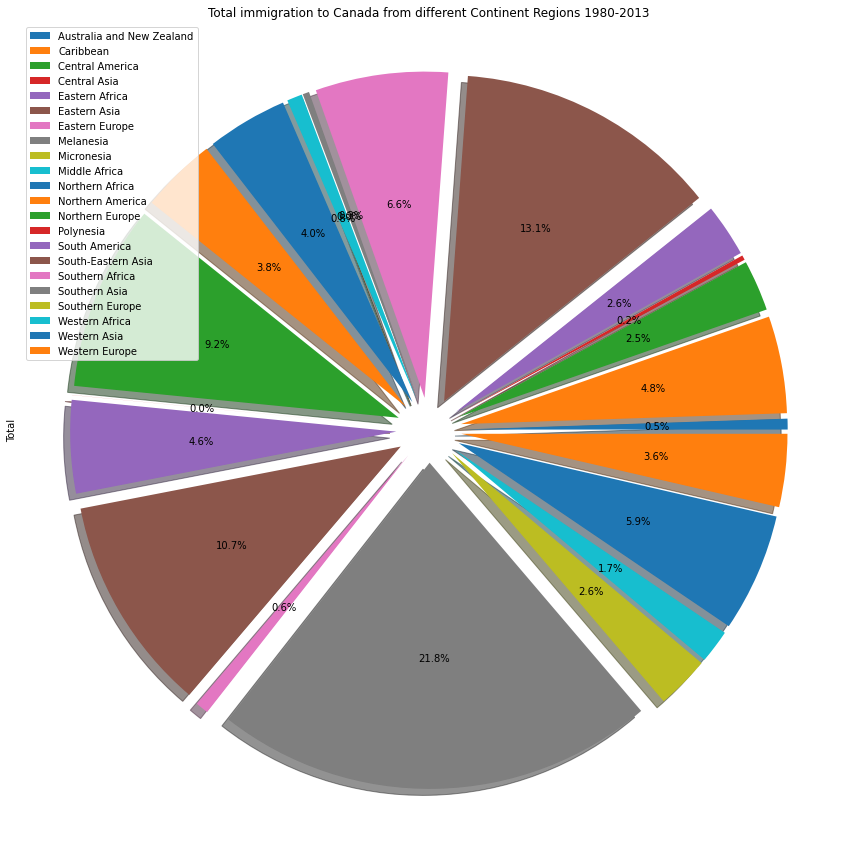

In [10]:
temp = canada.groupby('Continent-Region', axis='rows').sum()

import numpy as np
explodes = 0.1*np.ones(22)

temp['Total'].plot(
    kind='pie',
    figsize=(15,15),
    autopct='%1.1f%%',
    shadow=True,
    labels=None,
    explode=explodes
)
plt.title("Total immigration to Canada from different Continent Regions 1980-2013")
plt.legend(labels=temp.index, loc="upper left")
plt.show()

**Ploat a pie-chart based on Development-status use colorlists, explode, pct, figsize, add title, add axes, add legend and use shadows.**

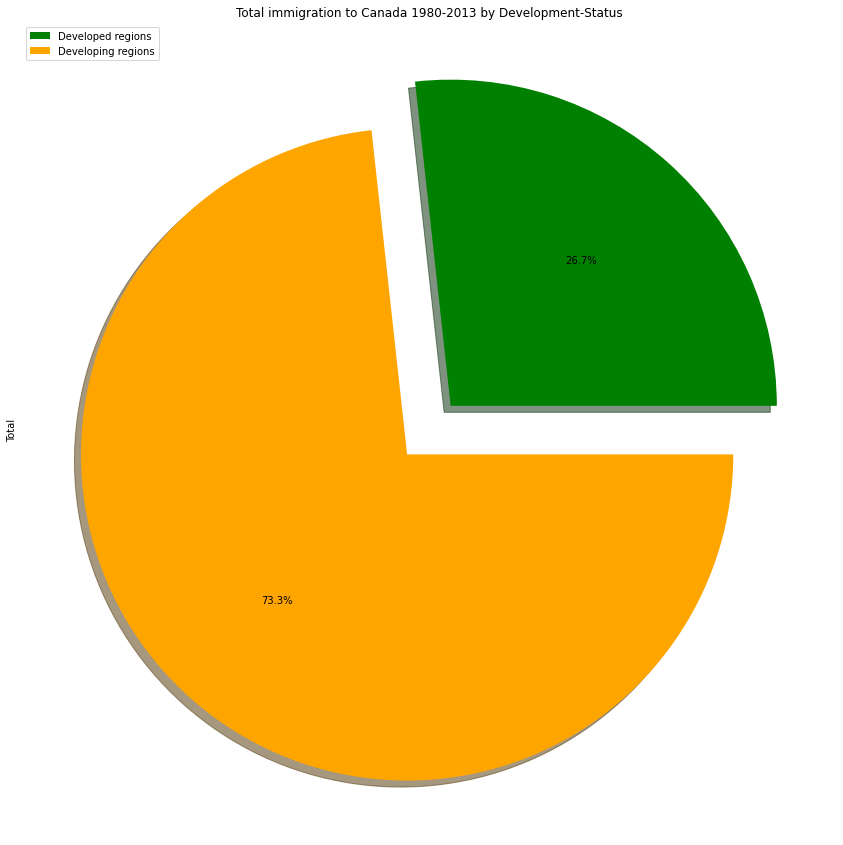

In [11]:
temp = canada.groupby('Development-status', axis='rows').sum()

explodes = [0.1,0.1]
colors = ['green','orange']

temp['Total'].plot(
    kind='pie',
    figsize=(15,15),
    autopct='%1.1f%%',
    shadow=True,
    labels=None,
    colors=colors,
    explode=explodes
)
plt.title("Total immigration to Canada 1980-2013 by Development-Status")
plt.legend(labels=temp.index, loc="upper left")
plt.show()

## Box Plots

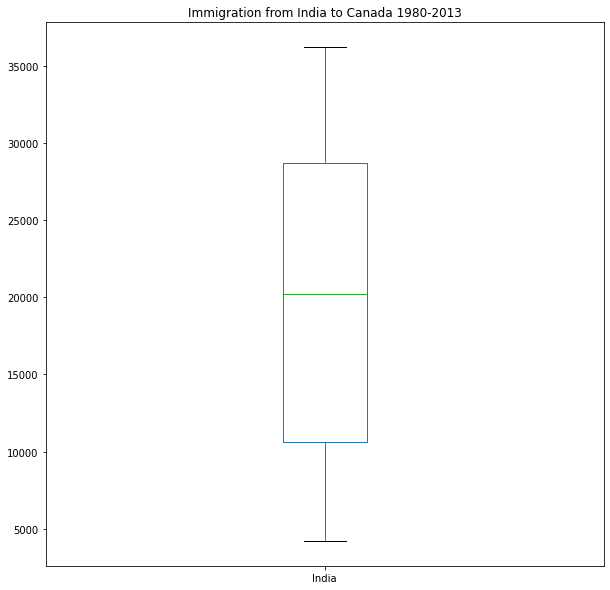

In [12]:
temp = canada.loc[['India'],years].transpose()

temp.plot(
    kind="box",
    figsize=(10,10)
)
plt.title("Immigration from India to Canada 1980-2013")
plt.show()

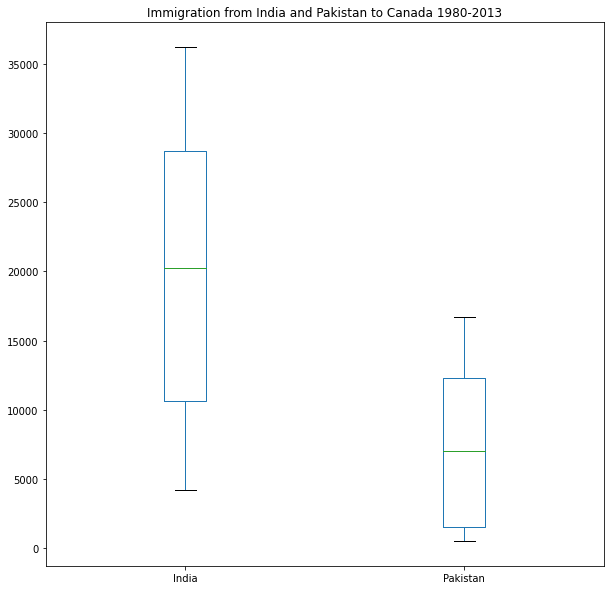

In [13]:
temp = canada.loc[['India','Pakistan'],years].transpose()

temp.plot(
    kind="box",
    figsize=(10,10)
)
plt.title("Immigration from India and Pakistan to Canada 1980-2013")
plt.show()

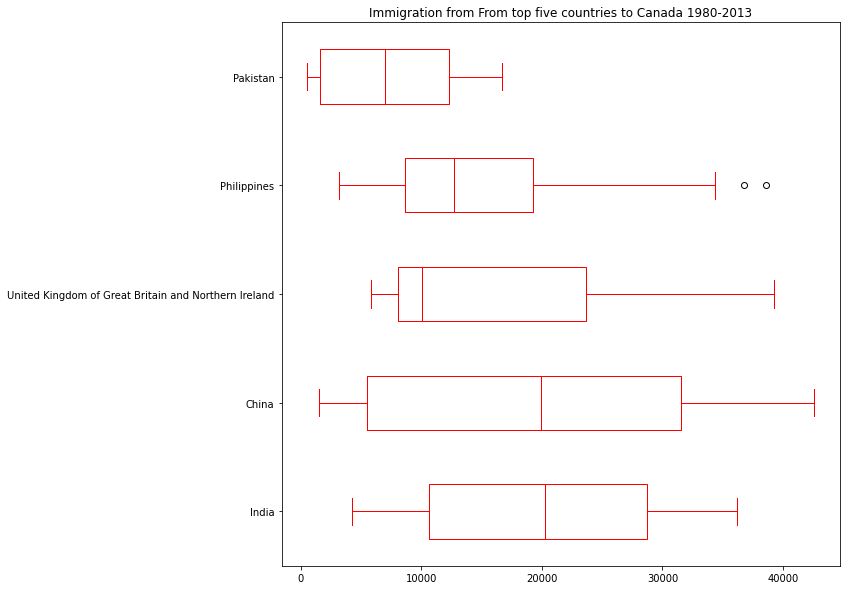

In [14]:
canada.sort_values(by='Total', ascending=False, inplace=True, axis='index')

temp = canada.head(5)
temp = temp[years].transpose()

temp.plot(
    kind="box",
    figsize=(10,10),
    vert=False,
    color='red'
)
plt.title("Immigration from From top five countries to Canada 1980-2013")
plt.show()

Subplots

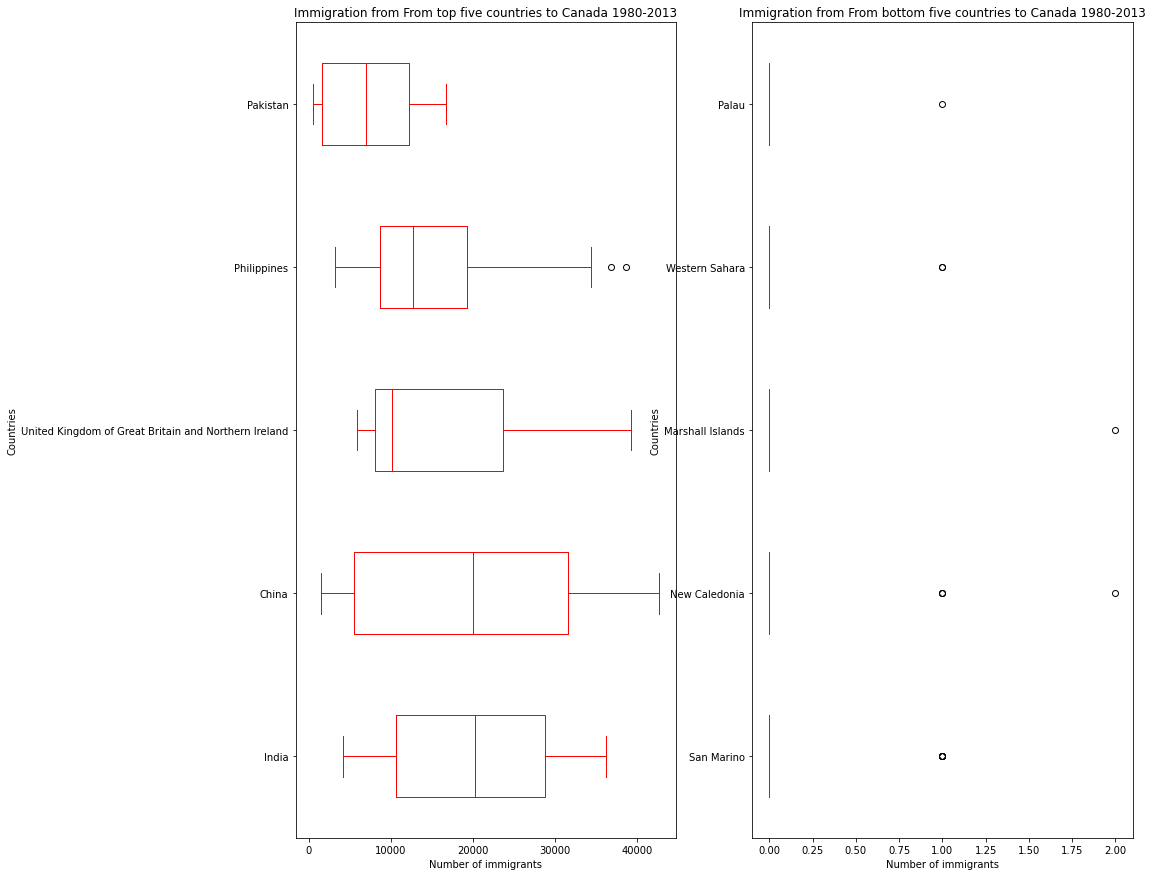

In [15]:
canada.sort_values(by='Total', ascending=False, inplace=True, axis='index')

temp1 = canada.head(5)
temp1 = temp1[years].transpose()

temp2 = canada.tail(5)
temp2 = temp2[years].transpose()

fig = plt.figure()

ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

temp1.plot(kind="box",figsize=(15,15),vert=False,color='red', ax=ax0)
ax0.set_title("Immigration from From top five countries to Canada 1980-2013")
ax0.set_xlabel("Number of immigrants")
ax0.set_ylabel("Countries")

temp2.plot(kind="box",figsize=(15,15),vert=False,color='red', ax=ax1)
ax1.set_title("Immigration from From bottom five countries to Canada 1980-2013")
ax1.set_xlabel("Number of immigrants")
ax1.set_ylabel("Countries")

plt.show()

**Create 4 subplots - to display boxplot of top 5 countries in europe, asia, africa, oceania**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: SettingWithCop

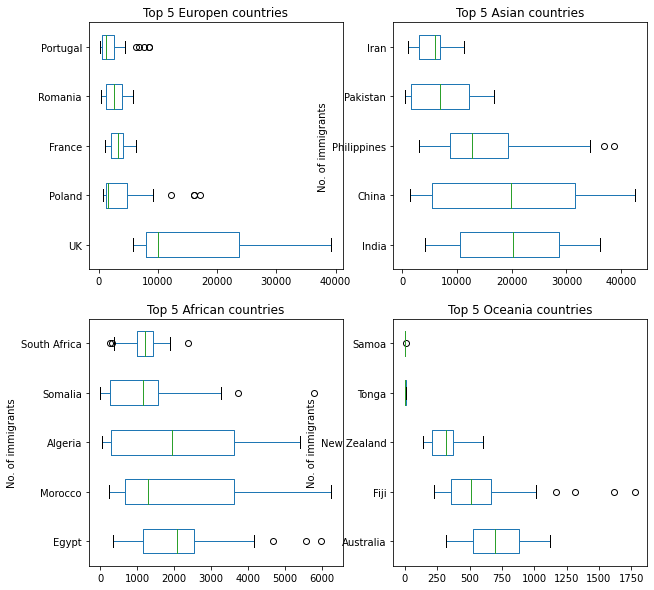

In [16]:
years=range(1980,2014)
condition=canada['Continent']=='Europe'
dfnew=canada[(condition)]

dfnew.sort_values(by="Total",axis='index',inplace=True,ascending=False)


dtope=dfnew.head(5)
dtope=dtope[years]
dtope=dtope.transpose()
dtope.rename(columns={'United Kingdom of Great Britain and Northern Ireland':'UK'}, inplace=True)

condition=canada['Continent']=='Asia'
dfnew=canada[(condition)]

dfnew.sort_values(by="Total",axis='index',inplace=True,ascending=False)


dtopa=dfnew.head(5)
dtopa=dtopa[years]
dtopa=dtopa.transpose()
dtopa.rename(columns={'Iran (Islamic Republic of)':'Iran'}, inplace=True)

dtopa.tail()

years=range(1980,2014)
condition=canada['Continent']=='Africa'
dfnew=canada[(condition)]

dfnew.sort_values(by="Total",axis='index',inplace=True,ascending=False)


dtopaf=dfnew.head(5)
dtopaf=dtopaf[years]
dtopaf=dtopaf.transpose()
dtopaf.tail()

years=range(1980,2014)
condition=canada['Continent']=='Oceania'
dfnew=canada[(condition)]

dfnew.sort_values(by="Total",axis='index',inplace=True,ascending=False)


dtopo=dfnew.head(5)
dtopo=dtopo[years]
dtopo=dtopo.transpose()
dtopo.tail()

#using subplots

fig=plt.figure()

#Create 2 subplots
ax1=fig.add_subplot(2,2,1)#2 row,2 columsn-1st figure
ax2=fig.add_subplot(2,2,2)#2 row,2 columsn-2nd figure
ax3=fig.add_subplot(2,2,3)#2 row,2 columsn-3rd figure
ax4=fig.add_subplot(2,2,4)#2 row,2 columsn-4th figure

#write whic is ax1 and which is ax2
dtope.plot(kind='box',figsize=(10,10),vert=False,ax=ax1)
ax1.set_title("Top 5 Europen countries")
ax2.set_ylabel('No. of immigrants')

dtopa.plot(kind='box',figsize=(10,10),vert=False,ax=ax2)
ax2.set_title("Top 5 Asian countries")
ax2.set_ylabel('No. of immigrants')

dtopaf.plot(kind='box',figsize=(10,10),vert=False,ax=ax3)
ax3.set_title("Top 5 African countries")
ax3.set_ylabel('No. of immigrants')

dtopo.plot(kind='box',figsize=(10,10),vert=False,ax=ax4)
ax4.set_title("Top 5 Oceania countries")
ax4.set_ylabel('No. of immigrants')



plt.show()

Outliers

In [17]:
# identify outliers
# any value greater than Q3 by 1.5IQR
#any value less than Q1 by 1.5IQR
#IQR = Q3-Q1

dfindia = canada.loc[['India'], years].transpose().describe()

Q1 = 10343.0
Q3= 28572.0
IQR=Q3-Q1
Outlier1 = Q3+1.5*IQR
Outlier2 = Q1 - 1.5*IQR
print(Outlier1)
print(Outlier2)

55915.5
-17000.5


In [18]:
dfindia = canada.loc[['India'], years]

**Identify countries which are outliers in the year 2013**

In [19]:
Q1 = 45
Q3 = 796
IQR = Q3 - Q1

Outlier1 = Q1 - (1.5)*(IQR)
Outlier2 = Q3 + (1.5)*(IQR)

Outliers=canada[(canada[2013]< Outlier1 ) | (canada[2013]> Outlier2 )]
Outliers.reset_index(inplace=True)
print(Outliers.shape)
print(Outliers)

(29, 39)
                                              Country  ...   Total
0                                               India  ...  691904
1                                               China  ...  659962
2   United Kingdom of Great Britain and Northern I...  ...  551500
3                                         Philippines  ...  511391
4                                            Pakistan  ...  241600
5                            United States of America  ...  241122
6                          Iran (Islamic Republic of)  ...  175923
7                                           Sri Lanka  ...  148358
8                                   Republic of Korea  ...  142581
9                                             Lebanon  ...  115359
10                                             France  ...  109091
11                                            Jamaica  ...  106431
12                                           Viet Nam  ...   97146
13                                              Haiti

## Scatter Plot

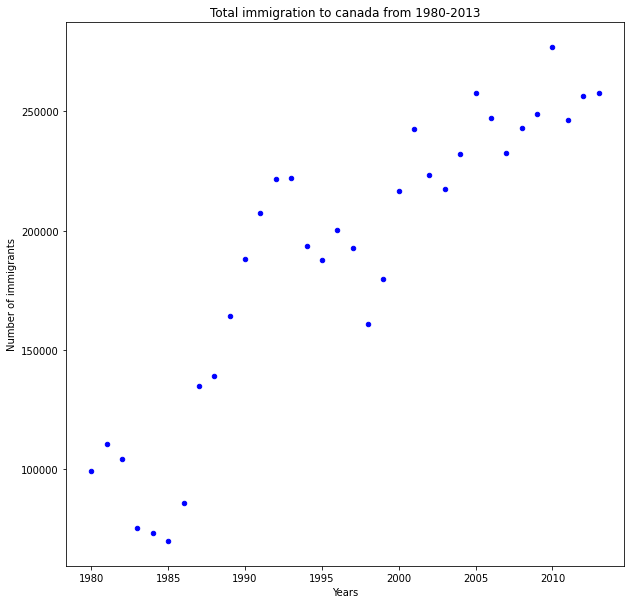

In [20]:
years = range(1980,2014)
dfscat = pd.DataFrame(canada[years].sum(axis='index'))

dfscat.reset_index(inplace=True)

dfscat.columns = ['Year', 'Total']

dfscat.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Total',
    color='blue'
)
plt.title("Total immigration to canada from 1980-2013")
plt.xlabel("Years")
plt.ylabel("Number of immigrants")
plt.show()

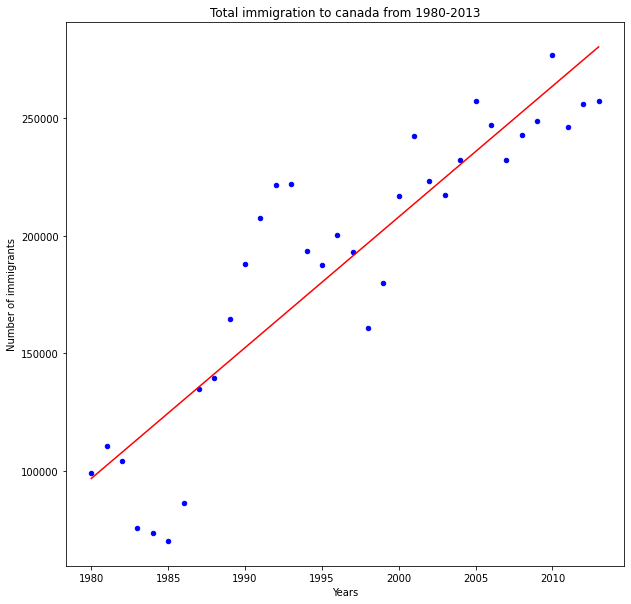

In [21]:
import numpy as np
x=dfscat['Year']
y=dfscat['Total']
fit=np.polyfit(x,y,1)

dfscat.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Total',
    color='blue'
)
plt.title("Total immigration to canada from 1980-2013")
plt.xlabel("Years")
plt.ylabel("Number of immigrants")

plt.plot(x, fit[0]*x+fit[1], color='red')

plt.show()

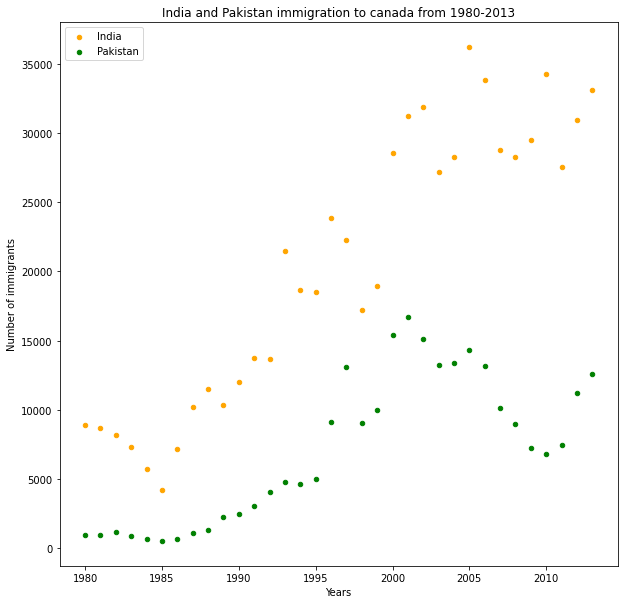

In [22]:
dfindopak = canada.loc[['India','Pakistan'], years].transpose()
dfindopak.reset_index(inplace=True)
dfindopak.index.name = 'index'
dfindopak.rename(columns={'index':'Year'}, inplace=True)

ax0 = dfindopak.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='India',
    color='orange'
)

ax1 = dfindopak.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Pakistan',
    color='green',
    ax=ax0
)


ax0.set_title("India and Pakistan immigration to canada from 1980-2013")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of immigrants")
ax0.legend(['India','Pakistan'], loc='upper left')



## Bubble Plot

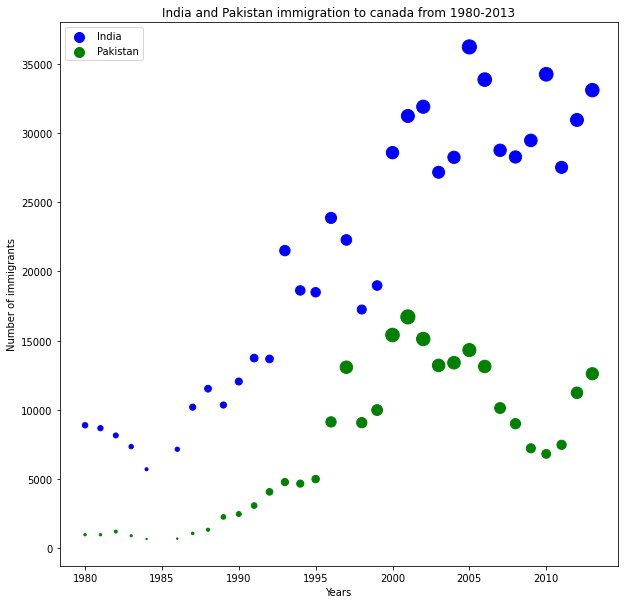

In [23]:
#bubble plots - size of each dot on the scatter plot is proportional to its magnitude
#min-max scaling = X' = (X - Xmin)/(Xmax - Xmin)

normindia = (dfindopak['India'] - dfindopak['India'].min()) / (dfindopak['India'].max() - dfindopak['India'].min())
normpak = (dfindopak['Pakistan'] - dfindopak['Pakistan'].min()) / (dfindopak['Pakistan'].max() - dfindopak['Pakistan'].min())

ax0 = dfindopak.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='India',
    color='blue',
    s = normindia*200
)

ax1 = dfindopak.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Pakistan',
    color='green',
    ax=ax0,
    s = normpak*200
)


ax0.set_title("India and Pakistan immigration to canada from 1980-2013")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of immigrants")
ax0.legend(['India','Pakistan'], loc='upper left')


**Plot the bubble plot for Norway, Denmark, Finland**

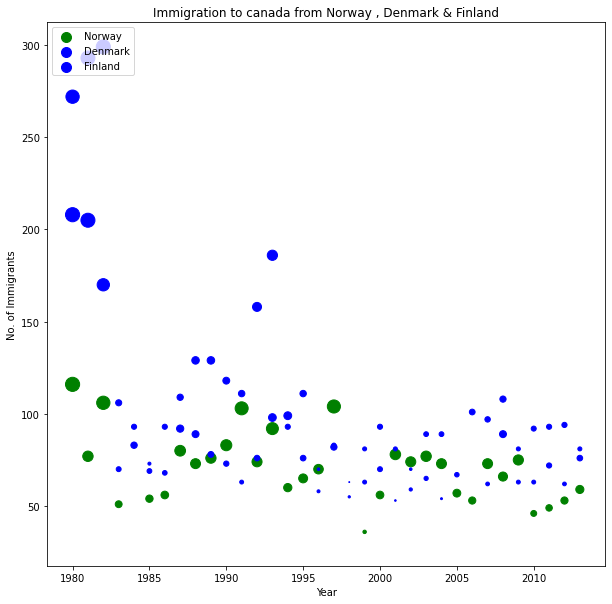

In [24]:
dfnew = canada[years].transpose()
dfnew.reset_index(inplace=True)
dfnew.head()
dfnew.rename(columns={'index':'Year'}, inplace=True)
dfnew['Total'] = dfnew.sum(axis='columns')
dfnew=dfnew[['Year',"Denmark","Finland","Norway"]]

norm_Norway = (dfnew['Norway'] - dfnew['Norway'].min()) / (dfnew['Norway'].max() - dfnew['Norway'].min())
norm_Denamrk = (dfnew['Denmark'] - dfnew['Denmark'].min()) / (dfnew['Denmark'].max() - dfnew['Denmark'].min())
norm_Finland = (dfnew['Finland'] - dfnew['Finland'].min()) / (dfnew['Finland'].max() - dfnew['Finland'].min())

ax1=dfnew.plot(
    kind="scatter",
    x="Year",
    y="Norway",
    figsize=(10,10),
    color='green',
    s=norm_Norway*200
)

ax2=dfnew.plot(
    kind="scatter",
    x="Year",
    y="Denmark",
    figsize=(10,10),
    color='blue',
    ax=ax1,
    s=norm_Denamrk*200
)

ax3=dfnew.plot(
    kind="scatter",
    x="Year",
    y="Finland",
    figsize=(10,10),
    color='blue',
    ax=ax1,
    s=norm_Finland*200
)

ax1.set_title("Immigration to canada from Norway , Denmark & Finland")
ax1.set_ylabel("No. of Immigrants")
ax1.legend(['Norway','Denmark',"Finland"], loc='upper left')

## Waffle Charts

In [25]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


In [26]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

In [27]:
dfindopakchina = canada.loc[['India', 'Pakistan', 'China'], :]

dfindopakchina

,Continent,Continent-Region,Development-status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962


In [28]:
df_dsn = canada.loc[['India', 'Pakistan', 'China'], :]

categories = df_dsn.index.values # categories

value = dfindopakchina['Total']# correponding values of categories

#create a waffle chart

width=40
height=10

colormap = plt.cm.coolwarm # color map class

Total number of tiles is 400
India: 174
Pakistan: 61
China: 166


<Figure size 432x288 with 0 Axes>

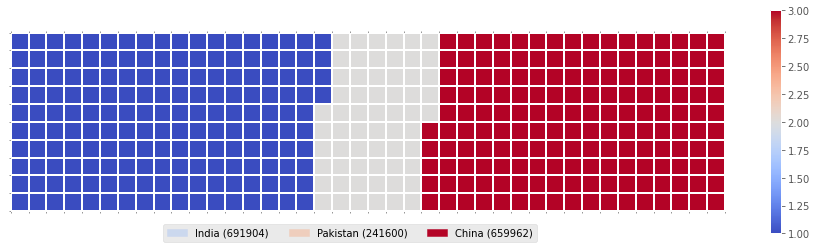

In [29]:
create_waffle_chart(categories, value, height, width, colormap)

**Create a Waffle chart with Norway,Sweden,Denamark**

Country
Norway     2327
Denmark    3901
Sweden     5866
Name: Total, dtype: int64
Total number of tiles is 500
Norway: 96
Denmark: 161
Sweden: 243


<Figure size 432x288 with 0 Axes>

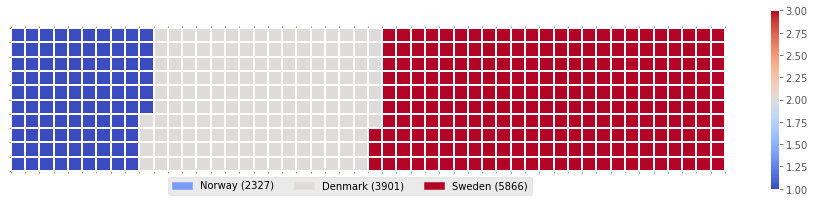

In [30]:
df_dsn = canada.loc[['Norway', 'Denmark', 'Sweden'], :]

width = 50 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values 
values = df_dsn['Total'] 

colormap = plt.cm.coolwarm 
print(values)

create_waffle_chart(categories, values, height, width, colormap)

## WordCloud

In [31]:
# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

# download file and save as alice_novel.txt
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/alice_novel.txt

# open the file and read it into a variable alice_novel
alice_novel = open('alice_novel.txt', 'r').read()
    
print ('File downloaded and saved!')

/bin/bash: conda: command not found
Wordcloud is installed and imported!
File downloaded and saved!


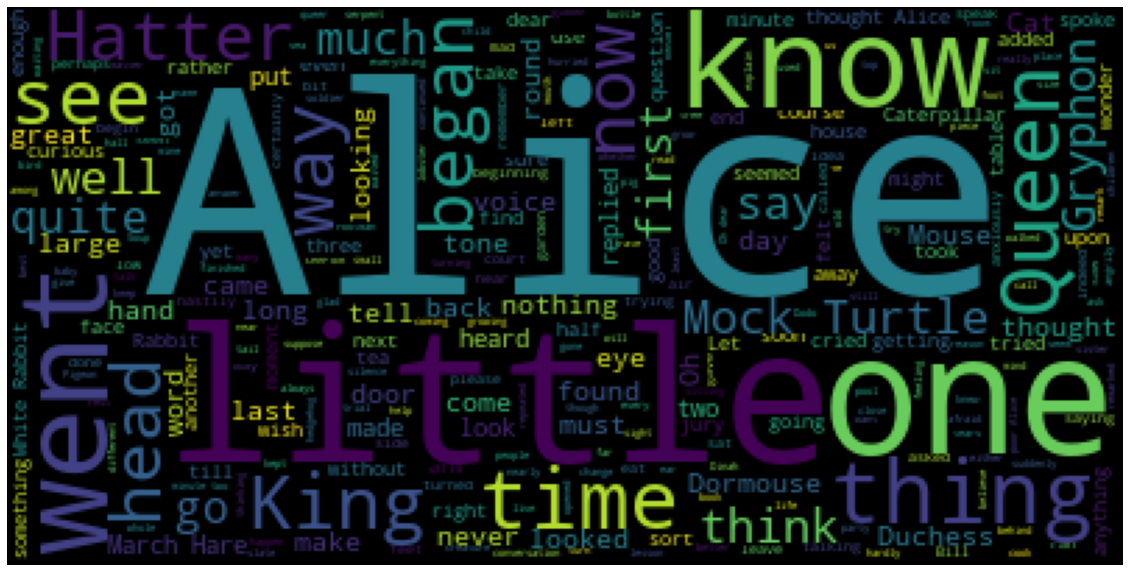

In [32]:
#step1 - preprocessing

stopwordsrem = set(STOPWORDS)
stopwordsrem.add('said')#As 'said' was first there twice also


#step 2-wordcloud object

alicewc = WordCloud(
    background_color = 'black',
    max_words = 2000,#How many maximum words you want
    stopwords = stopwordsrem
)


#step3 - use the object to call function
alicewc.generate(alice_novel)

# step 4 - display
fig=plt.figure()
fig.set_figwidth(20)
fig.set_figheight(20)
plt.imshow(alicewc)
plt.axis('off')#as here there is no axis
plt.show()

## Maps

In [33]:
import numpy as np
import pandas as pd
import folium 

In [34]:
map1=folium.Map()
map1

In [35]:
map2=folium.Map(location=[37.22,-122.16],zoom_start=12)
map2

In [36]:
map3 = folium.Map(location=[56.130, -106.35], zoom_start=10, tiles='Stamen Toner')
map3

In [37]:
map4 = folium.Map(location=[56.130, -106.35], zoom_start=5, tiles='Stamen Terrain')
map4

In [38]:
mumbaimap=folium.Map(location=[19.0760,72.8777],zoom_start=11)
mumbaimap

In [39]:
#Co-ordinates of Crime in san-Franciso
df_incidents = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')
 
print('Dataset downloaded and read into a pandas dataframe!')
 
df_incidents.head()
 
df_incidents.shape

Dataset downloaded and read into a pandas dataframe!


(150500, 13)

In [40]:
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


## Markers with Maps

In [41]:
#obtain dataset of first 100 only(0-99 rows)
df1=df_incidents.iloc[0:100,:]

#co-ordinates of San-Fransciso
lat=37.77
longs=-122.42

map1=folium.Map(location=[lat,longs],zoom_start=12)

#cluster
from folium import plugins
clust=plugins.MarkerCluster().add_to(map1)

#since 3 variables are looed we use zip function
for lat, longs, labels in zip(df1.Y, df1.X, df1.Category):
  folium.CircleMarker(
      [lat, longs],
      radius=5,
      color='yellow',
      fill=True,
      popup=labels,
      fill_color='blue',
      fill_opacity=0.6,
  ).add_to(clust)

map1

In [42]:
#to see all the first 100 crimes done on Friday
condition=df_incidents['DayOfWeek']=='Friday'
dfnew=df_incidents[(condition)]

df3=dfnew.iloc[0:100,:]

#co-ordinates of San-Fransciso
lat=37.77
longs=-122.42

map1=folium.Map(location=[lat,longs],zoom_start=12)
map1

#since 3 variables are looed we use zip function
for lat, longs, labels in zip(df3.Y, df3.X, df3.Category):
  folium.CircleMarker(
      [lat, longs],
      radius=5,
      color='yellow',
      fill=True,
      popup=labels,
      fill_color='blue',
      fill_opacity=0.6
  ).add_to(map1)

map1

## Chloropeth Maps

In [43]:
#we need countries immigration info & co-ordinates
canada.reset_index(inplace=True)

In [44]:
# download countries geojson file
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
 
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [45]:
#done 
#now
worldmap = folium.Map(location=[0,0], zoom_start=2, tiles='Stamen Watercolor')
worldmap

world_geo = r'world_countries.json'
#to introduce our scale:Like we did in binning(histogram)
scale = np.linspace(canada['Total'].min(), canada['Total'].max(), 6, dtype=int)
scale = scale.tolist()
scale[-1] = scale[-1]+1

worldmap.choropleth(
    geo_data = world_geo,#co-ordinates data
    data=canada,#immigartiondata
    columns=['Country','Total'],#what to plot from immigration Data
    key_on='feature.properties.name',#wLocation ofCountries names in JSON file
    legend='Immigration to Canada',
    fill_color='YlOrRd',#giving range of colors yellow to red
    threshold_scale=scale#applying above defined scale
 )

worldmap

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
